**[Clustering](https://scikit-learn.org/stable/modules/clustering.html)**

Cluster analysis, or clustering, is an unsupervised machine learning task.
Each clustering algorithm comes in two variants: a class, that implements the $\text{fit}$ method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the $\text{labels_}$ attribute.

There are many types of clustering algorithms.<br>
Many algorithms use similarity or distance measures between examples in the feature space in an effort to discover dense regions of observations. As such, it is often good practice to scale data prior to using clustering algorithms.
The scikit-learn library provides a suite of different [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) to choose from.

A list of 5 of the more popular algorithms with some sample code:

- [Agglomerative Clustering](#aggleromative)
- [DBSCAN](#dbscan)
- [K-Means](#kmeans)
- [Mixture of Gaussians](#gmm)
- [KNeighborsClassifier](#knclf)

Each algorithm offers a different approach to the challenge of discovering natural groups in data.
<hr>

<a id="agglomerative">**Agglomerative Clustering**</a>

**Example to agglomerative clustering**:
Show the agglomerative clustering algotithm with sample datasets [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) and [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).
most common parameter for agglomerative clustering:
- 'nCLusters' :$\quad$ n_clusters int or None, default=2 

The number of clusters to find. It must be None if distance_threshold is not None.


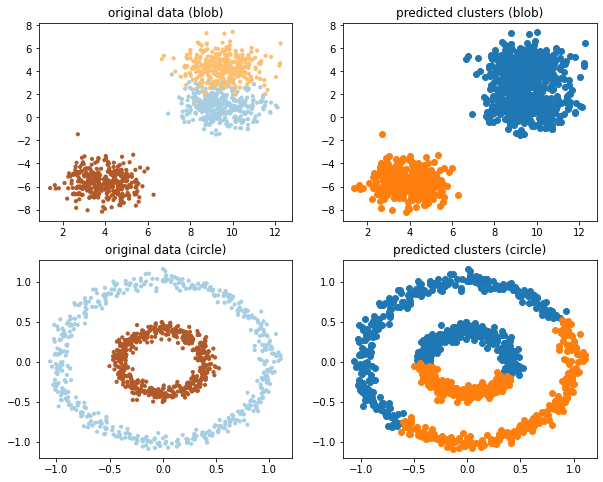

In [30]:
# resources
from numpy import unique
from numpy import arange
from numpy import where
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
#
# ----------------------------------------------------------------------------
# generate datasets
#
Xb, yb = make_blobs(n_samples=1000, n_features=2, centers=None, random_state=4)
Xc, yc = make_circles(n_samples=1000, factor=0.4, noise=0.05)
#
# ----------------------------------------------------------------------------
# define algorithm model:
#
nClusters = 2
#
model = AgglomerativeClustering(n_clusters=nClusters)
#
# fit model and predict clusters
# - make_blob dataset:
blob_yhat = model.fit_predict(Xb)
# - make_circle dataset:
circle_yhat = model.fit_predict(Xc)
#
# find the unique elements in the predicted clusters
blobClusters = unique(blob_yhat)
circleClusters = unique(circle_yhat)
#
# scatter plots for each dataset and their clusters
#
figAgglo, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].clear()
axes[0,1].clear()
axes[1,0].clear()
axes[1,1].clear()
    
axes[0,0].set_title("original data (blob)")
axes[1,0].set_title("original data (circle)")
axes[0,1].set_title("predicted clusters (blob)")
axes[1,1].set_title("predicted clusters (circle)")
        
axes[0,0].scatter(Xb[:, 0], Xb[:, 1], s=10, c=yb, cmap=pyplot.cm.Paired)
axes[1,0].scatter(Xc[:, 0], Xc[:, 1], s=10, c=yc, cmap=pyplot.cm.Paired)

for cluster in blobClusters:
    # get row indexes for samples with this cluster
    row_ix = where(blob_yhat == cluster)
    # create scatter of these samples
    axes[0,1].scatter(Xb[row_ix[0], 0], Xb[row_ix[0], 1])
#  
for cluster in circleClusters:
    # get row indexes for samples with this cluster
    row_ix = where(circle_yhat == cluster)
    # create scatter of these samples
    axes[1,1].scatter(Xc[row_ix[0], 0], Xc[row_ix[0], 1])
#

<a id="dbscan">**DBSCAN**</a>

<a id="">Example to DBSCAN clustering</a>

Show the [DBSCAN clustering algorithm](https://scikit-learn.org/stable/modules/clustering.html#dbscan) with sample datasets [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) and [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

Parameters:<br>
[DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN):
- eps = 0.3: $\quad$ The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.
- min_samples = 8: $\quad$ The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

[make_blob](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs):
- n_samples = 1000 $\quad$total number of points equally divided among clusters.
- rnd_state =  4 $\quad$Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.
- n_features = 2 $\quad$number of features for each sample.

[make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles):
- n_samples = 1000 $\quad$ total number of points generated.
- noise =  0.1 $\qquad$ Standard deviation of Gaussian noise added to the data.
- factor = 0.4 $\qquad$Scale factor between inner and outer circle. $0<factor<1$


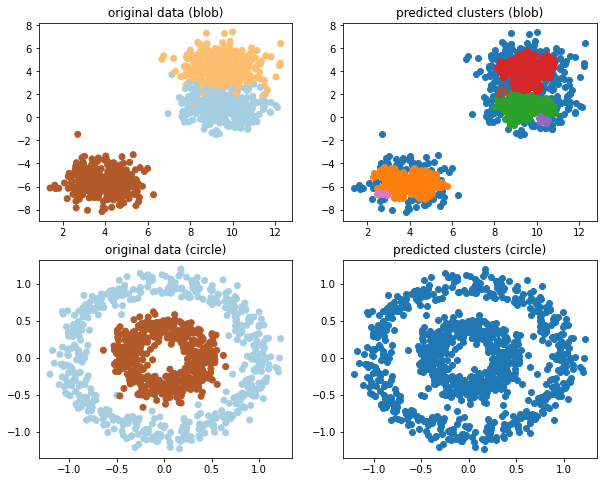

In [31]:
# resources
#
from numpy import unique
from numpy import arange
from numpy import where
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
#
#-----------------------------------------------------------------------------
# generate datasets
Xb, yb = make_blobs(n_samples=1000, n_features=2, random_state=4)
Xc, yc = make_circles(n_samples=1000, factor=0.4, noise=0.1)
#
#-----------------------------------------------------------------------------
#
eps = 0.3
minSamples = 8
#
model = DBSCAN(eps=eps, min_samples=minSamples)
#
# fit model and predict clusters
#
blob_yhat = model.fit_predict(Xb)
#
circle_yhat = model.fit_predict(Xc)
#
# get unique elements of the predicted array
blobClusters = unique(blob_yhat)
circleClusters = unique(circle_yhat)
#
# scatter plots for each dataset and their clusters
#
figDBSCAN, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].clear()
axes[0,1].clear()
axes[1,0].clear()
axes[1,1].clear()
    
axes[0,0].set_title("original data (blob)")
axes[1,0].set_title("original data (circle)")
axes[0,1].set_title("predicted clusters (blob)")
axes[1,1].set_title("predicted clusters (circle)")
        
axes[0,0].scatter(Xb[:, 0], Xb[:, 1], c=yb, cmap=pyplot.cm.Paired)
axes[1,0].scatter(Xc[:, 0], Xc[:, 1], c=yc, cmap=pyplot.cm.Paired)

for cluster in blobClusters:
    # get row indexes for samples with this cluster
    row_ix = where(blob_yhat == cluster)
    # create scatter of these samples
    axes[0,1].scatter(Xb[row_ix, 0], Xb[row_ix, 1])
#  
for cluster in circleClusters:
    # get row indexes for samples with this cluster
    row_ix = where(circle_yhat == cluster)
    # create scatter of these samples
    axes[1,1].scatter(Xc[row_ix, 0], Xc[row_ix, 1])
#  


<a id="kmeans">**K-Means**</a><br>
**example to K-Means clustering**

Show the [K-Means clustering algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-means) with sample datasets [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) and [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

Parameters:<br>
[K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans):
- nCLusters = 4 $\quad$ The number of clusters to form as well as the number of centroids to generate.

[make_blob](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs):
- n_samples = 1000 $\quad$total number of points equally divided among clusters.
- rnd_state =  4 $\quad$Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.
- n_features = 2 $\quad$number of features for each sample.

[make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles):
- n_samples = 1000 $\quad$ total number of points generated.
- noise =  0.1 $\qquad$ Standard deviation of Gaussian noise added to the data.
- factor = 0.4 $\qquad$Scale factor between inner and outer circle. $0<factor<1$


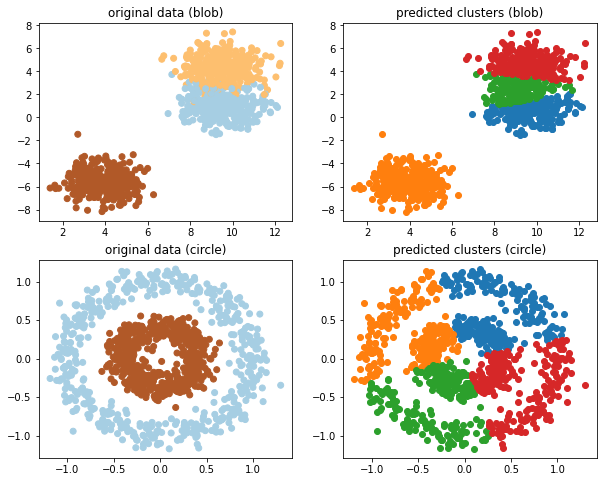

In [32]:
# resources:
#
from numpy import unique
from numpy import arange
from numpy import where
from sklearn.datasets import make_circles, make_blobs
from sklearn.cluster import KMeans
from matplotlib import pyplot
#
#-----------------------------------------------------------------------------
# generate datasets
#
Xb, yb = make_blobs(n_samples=1000, n_features=2, centers=None, random_state=4)
Xc, yc = make_circles(n_samples=1000, factor=0.4, noise=0.1)
#
#-----------------------------------------------------------------------------
nClusters = 4
#
model = KMeans(n_clusters = nClusters)
#
# fit model and predict clusters
# - make_blob dataset:
blob_yhat = model.fit_predict(Xb)
# - make_circle dataset:
circle_yhat = model.fit_predict(Xc)
#
#
blobClusters = unique(blob_yhat)
circleClusters = unique(circle_yhat)
#
# scatter plots for each dataset and their clusters
#
figKMeans, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].clear()
axes[0,1].clear()
axes[1,0].clear()
axes[1,1].clear()
    
axes[0,0].set_title("original data (blob)")
axes[1,0].set_title("original data (circle)")
axes[0,1].set_title("predicted clusters (blob)")
axes[1,1].set_title("predicted clusters (circle)")
        
axes[0,0].scatter(Xb[:, 0], Xb[:, 1], c=yb, cmap=pyplot.cm.Paired)
axes[1,0].scatter(Xc[:, 0], Xc[:, 1], c=yc, cmap=pyplot.cm.Paired)

for cluster in blobClusters:
    # get row indexes for samples with this cluster
    row_ix = where(blob_yhat == cluster)
    # create scatter of these samples
    axes[0,1].scatter(Xb[row_ix, 0], Xb[row_ix, 1])
#  
for cluster in circleClusters:
    # get row indexes for samples with this cluster
    row_ix = where(circle_yhat == cluster)
    # create scatter of these samples
    axes[1,1].scatter(Xc[row_ix, 0], Xc[row_ix, 1])
#  

<a id="gmm">**Example Gaussian Mixture Model**</a>

Show the [Gaussian mixture clustering algorithm](https://scikit-learn.org/stable/modules/mixture.html#gmm) with sample datasets [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) and [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

Parameters:<br>
[Gaussian mixture model](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture):
- n_components = 6: $\quad$ The number of mixture components.

[make_blob](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs):
- n_samples = 1000 $\quad$total number of points equally divided among clusters.
- rnd_state =  4 $\qquad$Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.
- n_features = 2 $\qquad$number of features for each sample.

[make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles):
- n_samples = 1000 $\quad$ total number of points generated.
- noise =  0.1 $\qquad$ Standard deviation of Gaussian noise added to the data.
- factor = 0.4 $\qquad$Scale factor between inner and outer circle. $\text{0<factor<1}$


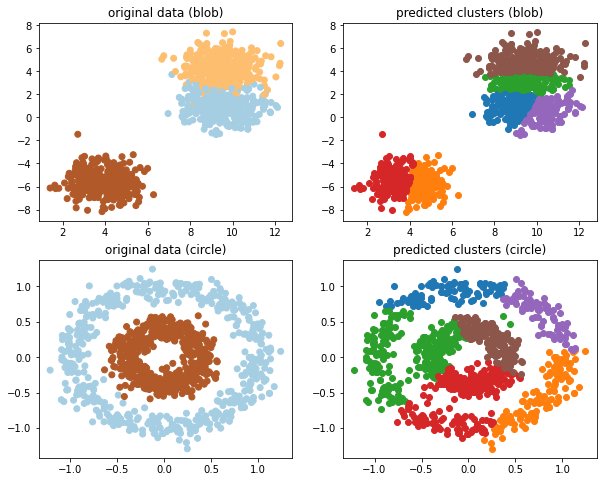

In [33]:
# resources
#
from numpy import unique
from numpy import arange
from numpy import where
from sklearn.datasets import make_circles, make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
#
#-----------------------------------------------------------------------------
#
# generate datasets
Xb, yb = make_blobs(n_samples=1000, n_features=2, centers=None, random_state=4)
Xc, yc = make_circles(n_samples=1000, factor=0.4, noise=0.1)
#
# define model
#
nComponents = 6
#
model = GaussianMixture(n_components = nComponents)
#
# fit model and predict clusters
# - make_blob dataset:
blob_yhat = model.fit_predict(Xb)
# - make_circle dataset:
circle_yhat = model.fit_predict(Xc)
#
#
blobClusters = unique(blob_yhat)
circleClusters = unique(circle_yhat)
#
# scatter plots for each dataset and their clusters
#
figKMeans, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].clear()
axes[0,1].clear()
axes[1,0].clear()
axes[1,1].clear()
    
axes[0,0].set_title("original data (blob)")
axes[1,0].set_title("original data (circle)")
axes[0,1].set_title("predicted clusters (blob)")
axes[1,1].set_title("predicted clusters (circle)")
#
# plot original data
axes[0,0].scatter(Xb[:, 0], Xb[:, 1], c=yb, cmap=pyplot.cm.Paired)
axes[1,0].scatter(Xc[:, 0], Xc[:, 1], c=yc, cmap=pyplot.cm.Paired)

for cluster in blobClusters:
    # get row indexes for samples with this cluster
    row_ix = where(blob_yhat == cluster)
    # create scatter of these samples
    axes[0,1].scatter(Xb[row_ix, 0], Xb[row_ix, 1])
#  
for cluster in circleClusters:
    # get row indexes for samples with this cluster
    row_ix = where(circle_yhat == cluster)
    # create scatter of these samples
    axes[1,1].scatter(Xc[row_ix, 0], Xc[row_ix, 1])
#  

<a id="knclf">**Example KNeighboursClassifier**</a>

Show the [KNeighborsClassifier clustering algorithm](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification) with sample datasets [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles) and [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

Parameters:<br>
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier):
- n_neighbors: $\quad$ Number of neighbors to use by default for kneighbors queries.

[make_blob](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs):
- n_samples = 1000 $\quad$total number of points equally divided among clusters.
- rnd_state =  4 $\qquad$Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.
- n_features = 2 $\qquad$number of features for each sample.

[make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles):
- n_samples = 1000 $\quad$ total number of points generated.
- noise =  0.1 $\qquad$ Standard deviation of Gaussian noise added to the data.
- factor = 0.4 $\qquad$Scale factor between inner and outer circle. $\text{0<factor<1}$


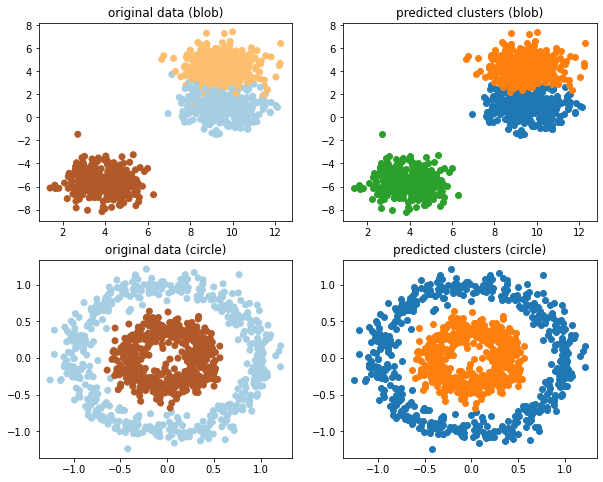

In [34]:
# resources:
#
from numpy import unique
from numpy import arange
from numpy import where
from sklearn.datasets import make_circles, make_blobs
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
#
#------------------------------------------------------------------
#
Xb, Yb = make_blobs(n_samples=1000, n_features=2, centers=None, random_state=4)
Xc, Yc = make_circles(n_samples=1000, factor=0.4, noise=0.1)
#
#
nNeighbors = 5
#
model= KNeighborsClassifier(n_neighbors = nNeighbors)
#
# fit model and predict clusters
model.fit(Xb,Yb)
#
blob_yhat = model.predict(Xb)
# - make_circle dataset:
model.fit(Xc,Yc)
circle_yhat = model.predict(Xc)
#
#
blobClusters = unique(blob_yhat)
circleClusters = unique(circle_yhat)
#
# scatter plots for each dataset and their clusters
#
figKMeans, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes[0,0].clear()
axes[0,1].clear()
axes[1,0].clear()
axes[1,1].clear()
    
axes[0,0].set_title("original data (blob)")
axes[1,0].set_title("original data (circle)")
axes[0,1].set_title("predicted clusters (blob)")
axes[1,1].set_title("predicted clusters (circle)")
        
# plot original data
axes[0,0].scatter(Xb[:, 0], Xb[:, 1], c=Yb, cmap=pyplot.cm.Paired)
axes[1,0].scatter(Xc[:, 0], Xc[:, 1], c=Yc, cmap=pyplot.cm.Paired)

for cluster in blobClusters:
    # get row indexes for samples with this cluster
    row_ix = where(blob_yhat == cluster)
    # create scatter of these samples
    axes[0,1].scatter(Xb[row_ix, 0], Xb[row_ix, 1])
#  
for cluster in circleClusters:
    # get row indexes for samples with this cluster
    row_ix = where(circle_yhat == cluster)
    # create scatter of these samples
    axes[1,1].scatter(Xc[row_ix, 0], Xc[row_ix, 1])
#  

Copyright © 2020 IUBH Internationale Hochschule